In [1]:
#%matplotlib inline
import lsst.daf.butler as dafButler
import lsst.afw.display as afwDisplay
from lsst.analysis.ap import apdb


import astropy.visualization as aviz
import matplotlib.pyplot as plt

import pandas as pd


In [2]:
afwDisplay.setDefaultBackend('firefly')

In [3]:
dataset = "dc2"
collection = "ap_verify-output"
base_path = "/sdf/group/rubin/user/parejko/scratch/ap_verify_runs/"
butler_main = lsst.daf.butler.Butler(f"{base_path}{dataset}-main/repo", collections=collection)
butler_new = lsst.daf.butler.Butler(f"{base_path}{dataset}-40507/repo", collections=collection)

In [4]:
dataids = list(butler_main.registry.queryDataIds(("visit", "detector"), datasets="initial_stars_footprints_detector"))
print("Number of exposures:", len(dataids))
display = afwDisplay.Display(frame=1)

Number of exposures: 2


In [5]:
display.getDefaultBackend()

'firefly'

In [3]:
repo = '/repo/main'
butler = dafButler.Butler(repo)
instrument = 'HSC'
skymap = 'hsc_rings_v1'

fakeStatus = 'with fakes'


dmnum = '37699'
collections = f'u/elhoward/DM-{dmnum}/HSC-precon-rb'
schema = f'elhoward_dm{dmnum}_hsc_appipewithfakes_precon_rb'
month = 'October'
year = '2023'

apdbQuery = apdb.ApdbPostgresQuery(butler=butler, instrument=instrument, namespace=schema)

In [16]:
with apdbQuery.connection as connection:
    srcTable = pd.read_sql_query('SELECT "dipoleLength", "dipoleAngle", "diaObjectId", "ra", "dec"  "ccdVisitId", \
                                 "psfFlux" AS "psFlux", "psfFluxErr" AS "psFluxErr", \
                                 "scienceFlux" AS "totFlux", "scienceFluxErr" AS "totFluxErr", "snr", \
                                 "flags", "band" AS "filterName" \
                                 FROM "{}"."DiaSource" LIMIT 100000;'.format(schema), connection)

In [17]:
srcTable

,dipoleLength,dipoleAngle,diaObjectId,ra,ccdVisitId,psFlux,psFluxErr,totFlux,totFluxErr,snr,flags,filterName
0,NaN,NaN,808430956708596,150.512463,2.338205,1697.917049,391.322042,1631.655928,390.162420,5.172753,0,y
1,NaN,NaN,808430956708597,150.512066,2.330343,1383.334502,392.396919,7886.109409,389.982984,5.040255,8388608,y
2,NaN,NaN,808430956708598,150.511874,2.320394,1620.428762,390.549705,1961.683475,385.162903,5.253160,1320,y
3,NaN,NaN,808430956708599,150.510887,2.367015,-1575.374033,401.263075,41944.156126,403.121687,5.090733,8388608,y
4,NaN,NaN,808430956708600,150.509815,2.366319,-1760.498056,390.116566,-1303.999623,391.479768,5.371327,0,y
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,NaN,NaN,8464695493132968,150.030071,2.504953,494.116725,91.079680,22506.972277,89.790116,11.500257,8388972,i
99996,NaN,NaN,8464695493132969,150.029390,2.550519,-7673.057996,88.657262,7042.996118,86.806946,24.497120,8391644,i
99997,NaN,NaN,8464695493132970,150.030930,2.568844,749.716305,94.746231,23929.728133,93.242757,7.773108,0,i
99998,NaN,NaN,8464695493132971,150.030972,2.551137,-403.162213,85.740913,-327.310387,83.940646,5.261158,8389596,i


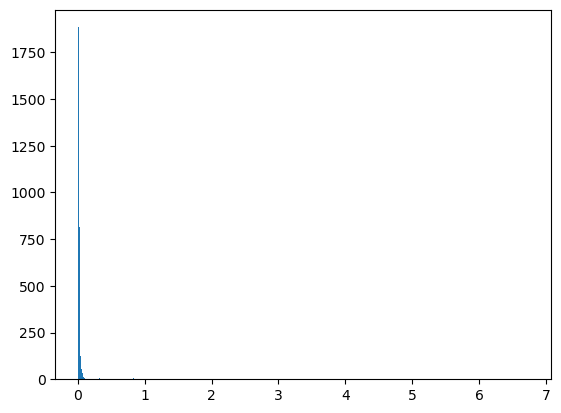

In [15]:
plt.hist(srcTable['dipoleLength'],bins=1000);

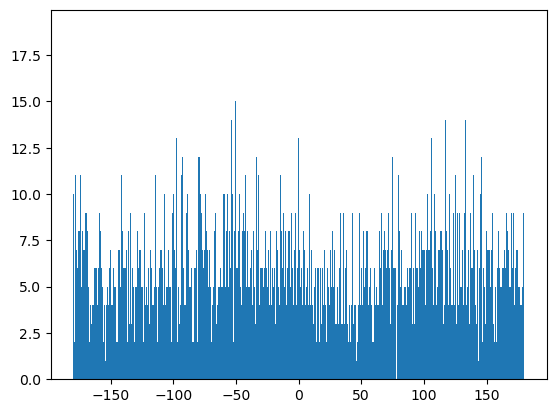

In [18]:
plt.hist(srcTable['dipoleAngle'],bins=1000);